In [1]:
from IPython.display import HTML
HTML('''
<script>
code_show=false;
function code_toggle(){
    if(code_show){$('.prompt, .input, .output_stderr, .output_error').hide();}
    else{$('.input, .prompt, .output_stderr, .output_error').show();}
    code_show=!code_show;
}
function initialize(){
    var output=$('.output_subarea.output_text.output_stream.output_stdout');
    $.merge(output,$('.output_subarea.output_text.output_result'));
    for(var i=0;i<output.length;i++)for(var j=0;j<output[i].children.length;j++)
        output[i].children[j].style.fontFamily='Palatino';
    code_toggle();
}
$(document).ready(initialize);
</script>
Click <a href="javascript:code_toggle()">here</a> to show/hide codes in this notebook.
''')

# Wasserstein metric
Here, we compare two PDFs or a field of PDFs using the [Wasserstein metric](https://en.wikipedia.org/wiki/Wasserstein_metric).

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import utils
import scipy

# 1D

Let $X$ ~ $N(\mu_x, \Sigma_x)$ and $Y$ ~ $N(\mu_y, \Sigma_y)$ be two random variables, of a normal distribution $p(x)$ and $q(x)$. We can compare their Wasserstein distance as followed:
$$
    W_p(\mu, \nu) = \left(\inf _{\gamma \in \Gamma (\mu ,\nu )}\int _{M\times M}d(x,y)^{p}\,\mathrm {d} \gamma (x,y)\right)^{1/p}
$$
For nornal distributions, the closed form can be used:
$$
    W_2(p, q)^2 = \Vert \mu_x - \mu_y \Vert_2^2 + \mathop{trace} \left( \Sigma_x + \Sigma_y - 2 \left( 
        \Sigma_y^{1/2} \Sigma_x \Sigma_y^{1/2}
    \right)^{1/2} \right)
$$
Or, for correlated distributions:
$$
    W_2(p, q)^2 = (\mu_x - \mu_y)^2 + (\sigma_x - \sigma_y)^2 + 2 \sigma_x \sigma_y (1 - \rho_{x,y})
$$

In [3]:
def wasserstein(mu1, var1, mu2, var2):
    return np.sqrt(
        ( mu1 - mu2 )**2 + ( np.sqrt(var1) - np.sqrt(var2) )**2
    )

def wasserstein_matrix(mu1, var1, mu2, var2):
    #print( np.trace( var1 ), np.trace( var2 ), np.trace(- 2 * np.transpose( np.transpose(var2) @ var1 @ np.transpose(var2) ) ) )
    return np.sqrt(
        np.linalg.norm( mu1.flatten() - mu2.flatten() )**2 + np.trace(
            var1 + var2 - 2 * scipy.linalg.sqrtm( scipy.linalg.sqrtm(var2) @ var1 @ scipy.linalg.sqrtm(var2) )
        )
    )

In [4]:
def normal_dist(x , mean , var):
    return 1 / np.sqrt(2*np.pi * var) * np.exp(-0.5*(x-mean)**2/var)

0.0


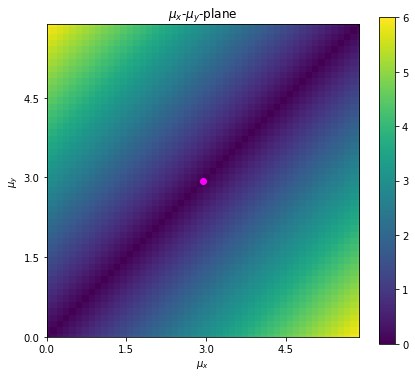

In [6]:
max_mu = 6.0
max_sigma = 2.0

def show_bhattacharyya_mu(mu_x = 0.0, var_x = 0.1, mu_y = 0.0, var_y = 0.6, max_mu=max_mu, max_sigma=max_sigma):
    mu1 = np.linspace(0, max_mu)
    mu2 = np.linspace(0, max_mu)
    
    mu11, mu22 = np.meshgrid(mu1, mu2)
    
    BD_mu = wasserstein(mu11, var_x, mu22, var_y)
    print(wasserstein(mu_x, var_x, mu_y, var_y))
    
    plt.figure(figsize=(7,6))
    plt.title(r'$\mu_x$-$\mu_y$-plane')
    plt.imshow(BD_mu)
    plt.colorbar()
    plt.scatter(mu_x/max_mu * (len(mu1)-1), mu_y/max_mu * (len(mu2)-1), c='magenta')
    plt.xlabel(r'$\mu_x$')
    plt.ylabel(r'$\mu_y$')
    plt.xticks(np.linspace(0, len(mu1), 5), np.linspace(mu1[0], mu1[-1], 5))
    plt.yticks(np.linspace(0, len(mu2), 5), np.linspace(mu2[0], mu2[-1], 5))
    plt.xlim(0,len(mu1)-1)
    plt.ylim(0,len(mu2)-1)
    
    plt.show()
    
def show_bhattacharyya_sigma(mu_x = 0.0, var_x = 0.1, mu_y = 0.0, var_y = 0.6, max_mu=max_mu, max_sigma=max_sigma):
    var1 = np.linspace(0.1, max_sigma)
    var2 = np.linspace(0.1, max_sigma)
    
    var11, var22 = np.meshgrid(var1, var2)
    
    BD_var = wasserstein(mu_x, var11, mu_y, var22)
    print(wasserstein(mu_y, var_y, mu_x, var_x))
    
    plt.figure(figsize=(7,6))
    plt.title(r'$\sigma_x$-$\sigma_y$-plane')
    plt.imshow(BD_var)
    plt.colorbar()
    plt.scatter(var_x / max_sigma * (len(var1)-1), var_y / max_sigma * (len(var2)-1), c='magenta')
    plt.xlabel(r'$\sigma_x$')
    plt.ylabel(r'$\sigma_y$')
    plt.xticks(np.linspace(0, len(var1), 5), np.linspace(var1[0], var1[-1], 5))
    plt.yticks(np.linspace(0, len(var2), 5), np.linspace(var2[0], var2[-1], 5))
    plt.xlim(0,len(var1)-1)
    plt.ylim(0,len(var2)-1)
    plt.show()
    
def show_pdfs(mu_x = 0.0, var_x = 0.1, mu_y = 0.0, var_y = 0.6, max_mu=max_mu):
    space = np.linspace(0, max_mu, 200)
    
    x = normal_dist(space, mu_x, var_x)
    y = normal_dist(space, mu_y, var_y)
    
    plt.figure(figsize=(18,6))
    plt.plot(space, x)
    plt.plot(space, y)
    plt.xlim(0,max_mu)
    plt.ylim(0,4)
    plt.show()
    
mu_x_widget = widgets.FloatSlider(
    value=3.0,
    min=0,
    max=max_mu,
    step=0.1,
    description=r'$\mu_x$:',
    layout=widgets.Layout(left='70px', width='395px')
)

mu_y_widget = widgets.FloatSlider(
    value=3.0,
    min=0,
    max=max_mu,
    step=0.1,
    orientation='vertical',
    description=r'$\mu_y$:',
    layout=widgets.Layout(left='0px', height='355px')
)

var_x_widget = widgets.FloatSlider(
    value=0.1,
    min=0.1,
    max=max_sigma,
    step=0.1,
    description=r'$\sigma_x$:',
    layout=widgets.Layout(left='70px', width='405px')
)

var_y_widget = widgets.FloatSlider(
    value=0.1,
    min=0.1,
    max=max_sigma,
    step=0.1,
    orientation='vertical',
    description=r'$\sigma_y$:',
    layout=widgets.Layout(top='0px', height='355px')
)

sigma_interact = widgets.interactive_output(show_bhattacharyya_sigma, {
    'mu_x': mu_x_widget,
    'var_x': var_x_widget,
    'mu_y': mu_y_widget,
    'var_y': var_y_widget
})

mu_interact = widgets.interactive_output(show_bhattacharyya_mu, {
    'mu_x': mu_x_widget,
    'var_x': var_x_widget,
    'mu_y': mu_y_widget,
    'var_y': var_y_widget
})

pdf_interact = widgets.interactive_output(show_pdfs, {
    'mu_x': mu_x_widget,
    'var_x': var_x_widget,
    'mu_y': mu_y_widget,
    'var_y': var_y_widget
})

layout = widgets.HBox([
    widgets.VBox([
        mu_x_widget,
        widgets.HBox([
            mu_y_widget,
            mu_interact
        ])
    ]),
    widgets.VBox([
        var_x_widget,
        widgets.HBox([
            var_y_widget,
            sigma_interact
        ])
    ])
])

display(widgets.VBox([
    layout,
    pdf_interact
]))

# 2D (without covariance)

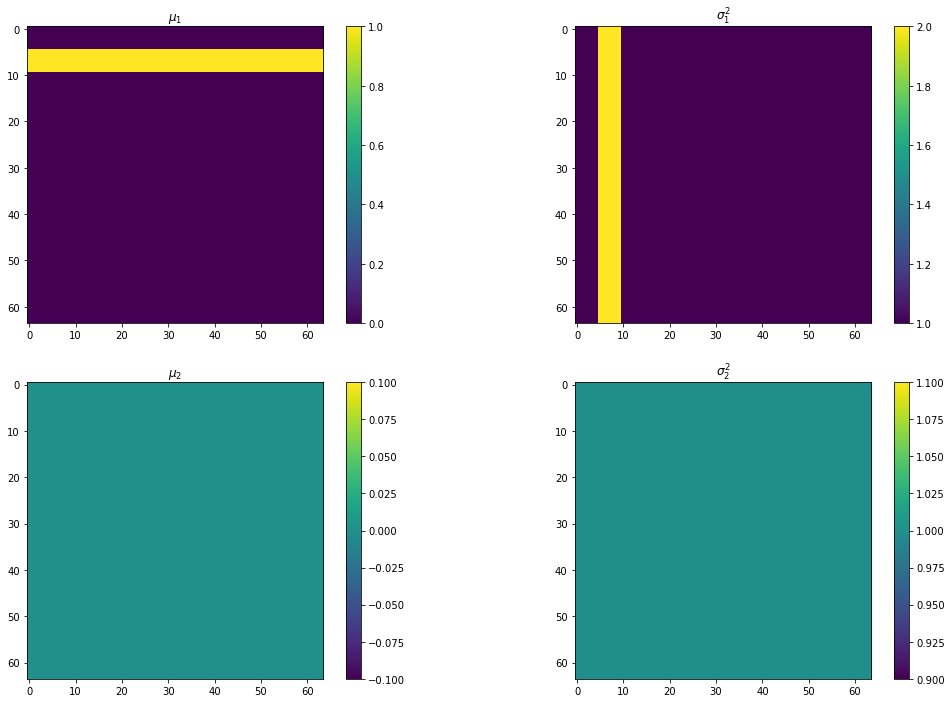

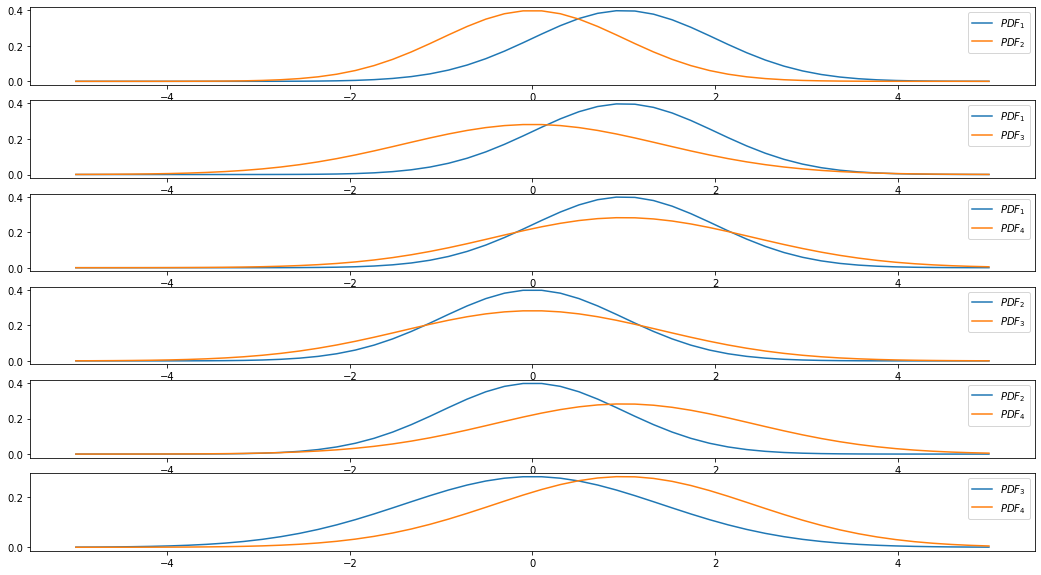

In [18]:
mu1 = np.zeros((64,64))
mu1[5:10,:] = 1.0
var1 = np.ones((64,64))
var1[:,5:10] = 2.0

mu2 = np.zeros((64,64))
mu2[:32,:32] = mu1[16:48,16:48]
mu2[32:,:32] = mu1[16:48,16:48]
mu2[32:,32:] = mu1[16:48,16:48]
mu2[:32,32:] = mu1[16:48,16:48]

var2 = np.ones((64,64))
var2[:32,:32] = var1[16:48,16:48]
var2[32:,:32] = var1[16:48,16:48]
var2[32:,32:] = var1[16:48,16:48]
var2[:32,32:] = var1[16:48,16:48]

plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
plt.title(r'$\mu_1$')
plt.imshow(mu1)
plt.colorbar()

plt.subplot(2,2,2)
plt.title(r'$\sigma_1^2$')
plt.imshow(var1)
plt.colorbar()

plt.subplot(2,2,3)
plt.title(r'$\mu_2$')
plt.imshow(mu2)
plt.colorbar()

plt.subplot(2,2,4)
plt.title(r'$\sigma_2^2$')
plt.imshow(var2)
plt.colorbar()

plt.show()

x = np.linspace(-5,5)

pdf1 = normal_dist(x, 1, 1)
pdf2 = normal_dist(x, 0, 1)
pdf3 = normal_dist(x, 0, 2)
pdf4 = normal_dist(x, 1, 2)

plt.figure(figsize=(18,10))
plt.subplot(6,1,1)
plt.plot(x, pdf1, label=r'$PDF_1$')
plt.plot(x, pdf2, label=r'$PDF_2$')
plt.legend()
plt.subplot(6,1,2)
plt.plot(x, pdf1, label=r'$PDF_1$')
plt.plot(x, pdf3, label=r'$PDF_3$')
plt.legend()
plt.subplot(6,1,3)
plt.plot(x, pdf1, label=r'$PDF_1$')
plt.plot(x, pdf4, label=r'$PDF_4$')
plt.legend()
plt.subplot(6,1,4)
plt.plot(x, pdf2, label=r'$PDF_2$')
plt.plot(x, pdf3, label=r'$PDF_3$')
plt.legend()
plt.subplot(6,1,5)
plt.plot(x, pdf2, label=r'$PDF_2$')
plt.plot(x, pdf4, label=r'$PDF_4$')
plt.legend()
plt.subplot(6,1,6)
plt.plot(x, pdf3, label=r'$PDF_3$')
plt.plot(x, pdf4, label=r'$PDF_4$')
plt.legend()
plt.show()

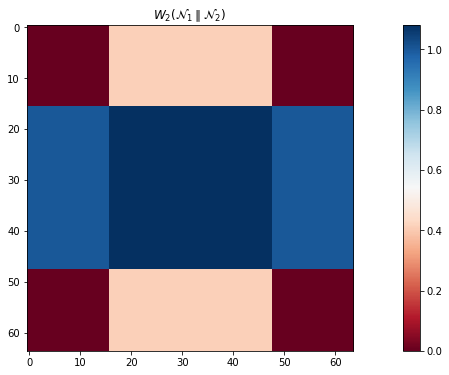

In [17]:
diff = wasserstein(mu1, var1, mu2, var2)

plt.figure(figsize=(18,6))
plt.title(r'$W_2( \mathcal{N}_1 \parallel \mathcal{N}_2 )$')
plt.imshow(diff, cmap='RdBu')
plt.colorbar()
plt.show()

In [7]:
width = 10
percent = 5
 
#input_range = 8649.794 # max - min value of sinogram
input_range = 1100
var = np.ones((64,64)) * input_range
Sigma_in = utils.build_covariance_y(var, function=utils.exponential, width=width)

algs = ['ramp', 'cosine', 'hamming', 'hann', 'shepp-logan', 'None']

@widgets.interact(algo1=algs, algo2=algs)
def compare(algo1='ramp', algo2='cosine'):
    mu1 = np.load('../../Data/iradon/mu_'+algo1+'.npy')
    df_dx1 = np.load('../../Data/iradon/df_dx_'+algo1+'.npy')
    Sigma1 = df_dx1 @ Sigma_in @ np.transpose(df_dx1)
    variance1 = np.reshape(np.abs(np.diag(Sigma1)), mu1.shape)
    
    mu2 = np.load('../../Data/iradon/mu_'+algo2+'.npy')
    df_dx2 = np.load('../../Data/iradon/df_dx_'+algo2+'.npy')
    Sigma2 = df_dx2 @ Sigma_in @ np.transpose(df_dx2)
    variance2 = np.reshape(np.abs(np.diag(Sigma2)), mu2.shape)
    
    BD = wasserstein(mu1, variance1, mu2, variance2)
    
    plt.figure(figsize=(18,6))
    plt.suptitle(algo1)
    plt.subplot(1,2,1)
    plt.imshow(mu1)
    plt.colorbar()

    plt.subplot(1,2,2)
    plt.imshow(variance1)
    plt.colorbar()
    
    plt.show()
    
    plt.figure(figsize=(18,6))
    plt.suptitle(algo2)
    plt.subplot(1,2,1)
    plt.imshow(mu2)
    plt.colorbar()

    plt.subplot(1,2,2)
    plt.imshow(variance2)
    plt.colorbar()
    
    plt.show()
    
    plt.figure(figsize=(18,6))
    plt.suptitle('difference')
    plt.subplot(1,2,1)
    plt.imshow(BD, cmap='Greys')
    plt.colorbar()
    
    plt.show()

interactive(children=(Dropdown(description='algo1', options=('ramp', 'cosine', 'hamming', 'hann', 'shepp-logan…

# 2D with ranged covariance

In [41]:
def get_neighbour_indices(p, n, width, height):
    '''
    Get all neighbour indices of p within a distance of n.
    
    example array: * * * * *
                   * + + + *
                   * + p + *
                   * + + + *
                   * * * * *
                   
    >> get_neighbour_indices(12, 1, 5, 5)
    [[ 6, 7, 8],    # + + +
     [ 11, 12, 13], # + p +
     [ 16, 17, 18]] # + + +
    
    Parameter
    ---------
    p: int
        Index of the target point.
    n: int
        Range of points.
    width: int
        Width of the underlying image.
    height: int
        Height of the underlying image.
        
    Return
    ------
    array_like
        List of the neighbour indices.
    '''
    
    assert p >= 0 and p < width * height, 'Index p must be positive and within the image range'
    assert width > 0 and height > 0, 'Image dimensions have to be positive'
    
    if n <= 0 or (width == 1 and height == 1):
        return np.array([p])
    
    current_row = p // width
    current_column = p % width
    top_row = max(current_row - n, 0)
    bottom_row = min(current_row + n, height - 1)
    left_column = max(current_column - n, 0)
    right_column = min(current_column + n, width - 1)
    
    ret = np.zeros((bottom_row - top_row + 1, right_column - left_column + 1 ), dtype=np.int64)
    
    # top block
    for idx,i in enumerate(range(top_row, bottom_row + 1)):
        for jdx,j in enumerate(range(left_column, right_column + 1)):
            ret[idx,jdx] = i * width + j
            
    return ret

In [42]:
width = 10
 
#input_range = 8649.794 # max - min value of sinogram
input_range = 1100
var = np.ones((64,64)) * input_range
Sigma_in = utils.build_covariance_y(var, function=utils.exponential, width=width)

algs = ['ramp', 'cosine', 'hamming', 'hann', 'shepp-logan', 'None']

@widgets.interact(algo1=algs, algo2=algs, width=(1,10))
def compare(algo1='ramp', algo2='cosine', width=10):
    mu1 = np.load('../../Data/iradon/mu_'+algo1+'.npy')
    df_dx1 = np.load('../../Data/iradon/df_dx_'+algo1+'.npy')
    Sigma1 = np.abs(df_dx1 @ Sigma_in @ np.transpose(df_dx1))
    variance1 = np.reshape(np.diag(Sigma1), mu1.shape)

    mu2 = np.load('../../Data/iradon/mu_'+algo2+'.npy')
    df_dx2 = np.load('../../Data/iradon/df_dx_'+algo2+'.npy')
    Sigma2 = np.abs(df_dx2 @ Sigma_in @ np.transpose(df_dx2))
    variance2 = np.reshape(np.diag(Sigma2), mu2.shape)

    BD = np.zeros((64*64,))
    for p in range(64*64):
        neigbours = get_neighbour_indices(p, 10, 64, 64)
        n_flatten = neigbours.flatten().astype(np.int64)
        S1 = Sigma1[neigbours,neigbours].reshape(neigbours.shape)
        S2 = Sigma2[neigbours,neigbours].reshape(neigbours.shape)
        M1 = mu1.flatten()[n_flatten]
        M2 = mu2.flatten()[n_flatten]

        BD[p] = wasserstein_matrix(M1, S1, M2, S2)

    BD = BD.reshape((64,64))

    plt.figure(figsize=(18,6))
    plt.suptitle(algo1)
    plt.subplot(1,2,1)
    plt.imshow(mu1)
    plt.colorbar()

    plt.subplot(1,2,2)
    plt.imshow(variance1)
    plt.colorbar()

    plt.show()

    plt.figure(figsize=(18,6))
    plt.suptitle(algo2)
    plt.subplot(1,2,1)
    plt.imshow(mu2)
    plt.colorbar()

    plt.subplot(1,2,2)
    plt.imshow(variance2)
    plt.colorbar()

    plt.show()

    plt.figure(figsize=(18,6))
    plt.suptitle('difference')
    plt.subplot(1,2,1)
    plt.imshow(BD, cmap='Greys')
    plt.colorbar()

    plt.show()

interactive(children=(Dropdown(description='algo1', options=('ramp', 'cosine', 'hamming', 'hann', 'shepp-logan…

# 2D with covariance

In [40]:
width = 10
percent = 5
 
input_range = 8649.794 # max - min value of sinogram
var = np.ones((64,64)) * input_range * percent*1e-2
Sigma_in = utils.build_covariance_y(var, function=utils.exponential, width=width)

algs = ['ramp', 'cosine', 'hamming', 'hann', 'shepp-logan']

@widgets.interact(algo1=algs, algo2=algs)
def compare(algo1='ramp', algo2='cosine'):
    mu1 = np.load('../../Data/iradon/mu_'+algo1+'.npy')
    df_dx1 = np.load('../../Data/iradon/df_dx_'+algo1+'.npy')
    Sigma1 = np.abs(df_dx1 @ Sigma_in @ np.transpose(df_dx1))
    
    mu2 = np.load('../../Data/iradon/mu_'+algo2+'.npy')
    df_dx2 = np.load('../../Data/iradon/df_dx_'+algo2+'.npy')
    Sigma2 = np.abs(df_dx2 @ Sigma_in @ np.transpose(df_dx2))
    
    BD = wasserstein_matrix(mu1, Sigma1, mu2, Sigma2)
    
    plt.figure(figsize=(18,6))
    plt.suptitle(algo1)
    plt.subplot(1,2,1)
    plt.imshow(mu1)
    plt.colorbar()

    plt.subplot(1,2,2)
    plt.imshow(Sigma1)
    plt.colorbar()
    
    plt.show()
    
    plt.figure(figsize=(18,6))
    plt.suptitle(algo2)
    plt.subplot(1,2,1)
    plt.imshow(mu2)
    plt.colorbar()

    plt.subplot(1,2,2)
    plt.imshow(Sigma2)
    plt.colorbar()
    
    plt.show()
    
    display(widgets.HTML('<h1>Difference: {:.02f}</h1>'.format(BD)))

interactive(children=(Dropdown(description='algo1', options=('ramp', 'cosine', 'hamming', 'hann', 'shepp-logan…